In [3]:
pd.read_csv("AAPL.csv", nrows=0).columns.tolist()

['Price', 'Close', 'High', 'Low', 'Open', 'Volume']

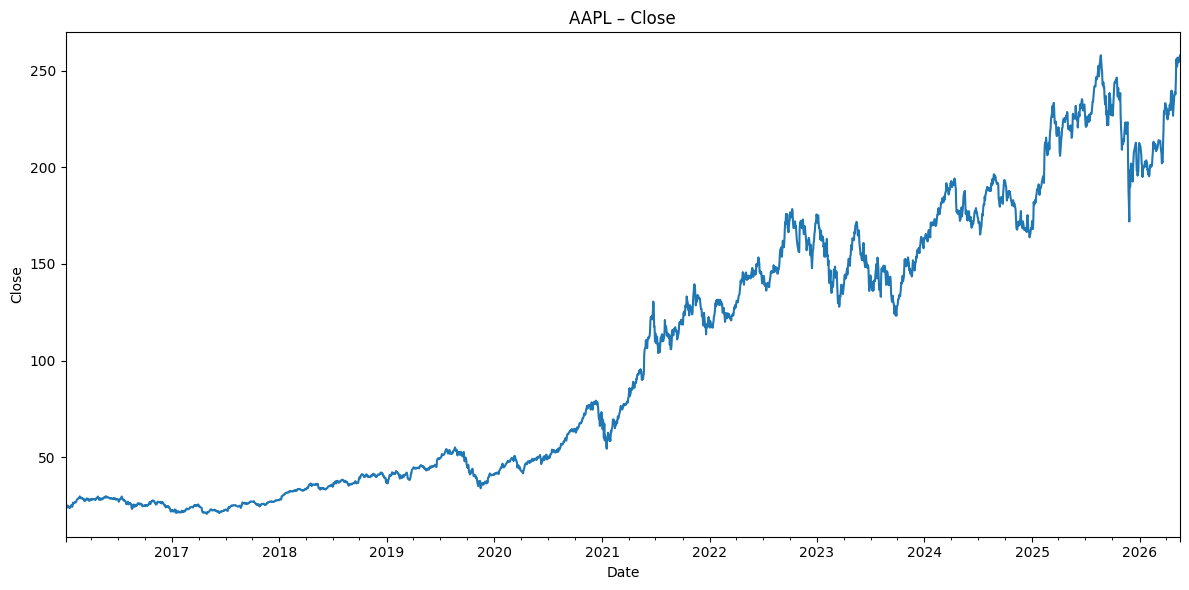

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# ---- 1) Làm sạch: ép các cột giá về số (loại bỏ dấu phẩy, $ ...)
def to_num(series):
    return pd.to_numeric(
        series.astype(str)
              .str.replace(',', '', regex=False)
              .str.replace('$', '', regex=False),
        errors='coerce'
    )

candidates = ["Adj Close", "Price", "Close"]
price_col = None
for c in candidates:
    if c in df.columns:
        s = to_num(df[c])
        if s.notna().sum() > 0:   # có dữ liệu số thật sự
            df[c] = s
            price_col = c
            break

# Nếu chưa chọn được, báo lỗi rõ ràng
if price_col is None:
    raise ValueError("Không tìm được cột giá dạng số trong CSV (thử các cột: Adj Close, Price, Close).")

# (tuỳ) làm sạch thêm các cột khác nếu cần
for c in ["Open", "High", "Low", "Volume"]:
    if c in df.columns:
        df[c] = to_num(df[c])

# ---- 2) Vẽ & lưu ảnh
ax = df[price_col].dropna().plot(figsize=(12,6), title=f"AAPL – {price_col}")
ax.set_xlabel("Date"); ax.set_ylabel(price_col)
plt.tight_layout(); plt.savefig("AAPL_plot.png", dpi=150); plt.show()
